In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
# loading the dataset
life_df=pd.read_csv("Life Expectancy Data.csv")
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Life Expectancy Data Dictionary of the Final Set of Variables Used

- **Country**: The name of the country for which the indicators are reported.
- **Year**: The calendar year to which all the data in that row pertain.
- **Status**: Binary variable, whether the country is classified as “Developed” or “Developing.”
- **Life expectancy**: The average number of years a newborn is expected to live in a given country if current mortality patterns remain the same.
- **Alcohol**: Estimated per capita (age 15+) alcohol consumption (in liters of pure alcohol per year).
- **Percentage expenditure**: Health expenditure as a percentage of total government expenditure per year.
- **Measles**: Number of reported measles cases in that year per 1000 population.
- **BMI**: Average Body Mass Index (mean BMI) in the population.
- **Under-five deaths**: The number of under five deaths per 1000 population.
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%).
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).
- **HIV/AIDS**: Deaths per 1,000 live births due to HIV/AIDS (0-4 years).
- **GDP**: Gross Domestic Product per capita (in USD).
- **Population**: Total population of the country in that year.
- **Thinness 1-19 years**: Prevalence (%) of thinness (low BMI) among children and adolescents 1–19 years old.
- **Schooling**: The average number of years of schooling (education) for the population.


In [5]:
# Initial Exploratory Data Analysis
life_df.describe().style.background_gradient(cmap='Blues')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.000000,2919.000000,2938.000000,2490.000000,2286.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,12753375.120052,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.498320,23.716912,5.077785,14270.169342,61012096.508428,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,34.000000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.935626,195793.250000,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1386542.000000,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.492500,97.000000,0.800000,5910.806335,7420359.000000,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,0.948000,20.700000


In [9]:
# Check for missing Life expectancy
missing_life = life_df[life_df['Life expectancy '].isnull()]
print(missing_life[['Country']])

                    Country
624            Cook Islands
769                Dominica
1650       Marshall Islands
1715                 Monaco
1812                  Nauru
1909                   Niue
1958                  Palau
2167  Saint Kitts and Nevis
2216             San Marino
2713                 Tuvalu


In [11]:
# Drop countries with missing Life expectancy
countries_to_drop = ['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']
life_df_test = life_df[~life_df['Country'].isin(countries_to_drop)]
life_df_test.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [13]:
# Check for missing Schooling
missing_school = life_df[life_df['Schooling'].isnull()]
print(np.unique(missing_school[['Country']]))

['Cook Islands' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Monaco' 'Niue' 'Republic of Korea'
 'Republic of Moldova' 'Somalia'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America']


In [19]:
# Check missing income composition
missing_income = life_df[life_df['Income composition of resources'].isnull()]
print(np.unique(missing_income[['Country']]))

['Cook Islands' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Marshall Islands' 'Monaco' 'Nauru'
 'Niue' 'Republic of Korea' 'Republic of Moldova' 'San Marino' 'Somalia'
 'Tuvalu' 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America']


In [21]:
# Check missing GDP
missing_gdp = life_df[life_df['GDP'].isnull()]
np.unique(missing_gdp['Country'])

array(['Bahamas', 'Bolivia (Plurinational State of)', 'Congo',
       'Cook Islands', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'Monaco', 'Niue',
       'Papua New Guinea', 'Republic of Korea', 'Republic of Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Slovakia', 'Somalia', 'South Sudan',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [23]:
# Check missing thinness 1-19
missing_thin = life_df[life_df[' thinness  1-19 years'].isnull()]
print(np.unique(missing_thin['Country']))

['Monaco' 'San Marino' 'South Sudan' 'Sudan']


In [25]:
# Focus on rows post-2015, check missing Total expenditure
life_no15 = life_df[life_df['Year']!=2015]
missing_exp = life_no15[life_no15['Total expenditure'].isnull()]
print(np.unique(missing_exp['Country']))

["Democratic People's Republic of Korea" 'Iraq' 'Somalia' 'South Sudan']


In [27]:
# Check missing BMI
missing_bmi = life_df[life_df[' BMI '].isnull()]
print(np.unique(missing_bmi['Country']))

['Monaco' 'San Marino' 'South Sudan' 'Sudan']


In [29]:
# Check missing Polio
missing_polio = life_df[life_df['Polio'].isnull()]
print(np.unique(missing_polio['Country']))

['Montenegro' 'South Sudan' 'Timor-Leste']


In [33]:
# Give the dataset a new name
life_df_cleaning = pd.read_csv("Life Expectancy Data.csv")

# Drop selected countries (there are serious missing data in these countries.)
countries_drop = [
    "Cook Islands",
    "Dominica",
    "Marshall Islands",
    "Monaco",
    "Nauru",
    "Niue",
    "Palau",
    "Saint Kitts and Nevis",
    "San Marino",
    "Tuvalu",
    "South Sudan",
    "Sudan",
    "Montenegro",
    "Timor-Leste",
    "Democratic People's Republic of Korea",
    "Somalia",
    "Syrian Arab Republic",
    "Eritrea"
]
life_df_cleaning = life_df_cleaning[~life_df_cleaning["Country"].isin(countries_drop)]

In [35]:
# Exclude 2015 rows
df_without_2015 = life_df_cleaning[life_df_cleaning['Year'] != 2015]

# Calculate mean Alcohol per country (from non-2015 data)
avg_alcohol_by_country = df_without_2015.groupby('Country')['Alcohol'].mean()

# Impute 2015 Alcohol with each country's mean
for country in avg_alcohol_by_country.index:
    life_df_cleaning.loc[
        (life_df_cleaning['Country'] == country) & (life_df_cleaning['Year'] == 2015),
        'Alcohol'
    ] = avg_alcohol_by_country[country]

# Manually fix Alcohol for Afghanistan
life_df_cleaning.loc[life_df_cleaning["Country"]=="Afghanistan","Alcohol"]

print("=== After initial cleaning (drop countries & fix Alcohol) ===")
print(life_df_cleaning.isnull().sum())
print()

=== After initial cleaning (drop countries & fix Alcohol) ===
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        501
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  176
Diphtheria                           0
 HIV/AIDS                            0
GDP                                394
Population                         608
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    128
Schooling                          128
dtype: int64



In [37]:
# Insert an external dataset called population
pop_wide = pd.read_csv("Revised_Population.csv", skiprows=4, engine='python')
pop_wide.rename(columns={"Country Name": "Country"}, inplace=True)

# Keep only years 1990–2019 + Country
year_cols = [str(y) for y in range(1990, 2020)]
cols_to_keep = ["Country"] + year_cols
pop_wide = pop_wide[cols_to_keep]

# Convert from wide to long format
pop_long = pd.melt(
    pop_wide,
    id_vars="Country",
    value_vars=year_cols,
    var_name="Year",
    value_name="Population"
)
pop_long["Year"] = pop_long["Year"].astype(int)

# Merge population data into life_df_cleaning
merged_pop = pd.merge(
    life_df_cleaning, 
    pop_long,
    on=["Country","Year"],
    how="left"
)

# Fill missing population & rename final column
if "Population_x" in merged_pop.columns and "Population_y" in merged_pop.columns:
    merged_pop["Population_x"] = merged_pop["Population_x"].fillna(merged_pop["Population_y"])
    merged_pop.drop(columns=["Population_y"], inplace=True)
    merged_pop.rename(columns={"Population_x":"Population"}, inplace=True)

life_df_cleaning = merged_pop

print("=== After merging Population ===")
print(life_df_cleaning.isnull().sum())
print()

=== After merging Population ===
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        501
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  176
Diphtheria                           0
 HIV/AIDS                            0
GDP                                394
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    128
Schooling                          128
dtype: int64



In [39]:
# Insert an external dataset called New_GDP
gdp_wide = pd.read_csv("New_GDP.csv")  
gdp_wide.rename(columns=lambda x: x.strip(), inplace=True)

# Keep years 1990–2019 + Country
year_cols2 = [str(y) for y in range(1990, 2020)]
cols_to_keep2 = ["Country"] + year_cols2
gdp_wide = gdp_wide[cols_to_keep2]

# Reshape GDP data from wide to long
gdp_long = pd.melt(
    gdp_wide,
    id_vars="Country",
    value_vars=year_cols2,
    var_name="Year",
    value_name="GDP"
)
gdp_long["Year"] = gdp_long["Year"].astype(int)

# Merge GDP into life_df_cleaning
merged_gdp = pd.merge(
    life_df_cleaning,
    gdp_long,
    on=["Country","Year"],
    how="left"
)

# Combine GDP columns
if "GDP_x" in merged_gdp.columns and "GDP_y" in merged_gdp.columns:
    merged_gdp["GDP_x"] = merged_gdp["GDP_x"].fillna(merged_gdp["GDP_y"])
    merged_gdp.drop(columns=["GDP_y"], inplace=True)
    merged_gdp.rename(columns={"GDP_x":"GDP"}, inplace=True)

life_df_cleaning = merged_gdp

print("=== After merging GDP ===")
print(life_df_cleaning.isnull().sum())
print()

# Check any remaining missing GDP
missing_gdp_rows = life_df_cleaning[life_df_cleaning["GDP"].isna()]
countries_still_missing_gdp = missing_gdp_rows["Country"].unique()
print("Countries still missing GDP:", countries_still_missing_gdp)
print("Rows still missing GDP:\n", missing_gdp_rows[["Country","Year"]].to_string(index=False))
print()

=== After merging GDP ===
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        501
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  176
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  2
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    128
Schooling                          128
dtype: int64

Countries still missing GDP: ['Sao Tome and Principe' 'Venezuela (Bolivarian Republic of)']
Rows still

In [41]:
# Manually fill missing GDP with each country's median
missing_pairs = [
    ("Sao Tome and Principe", 2000),
    ("Venezuela (Bolivarian Republic of)", 2015)
]

for (country_name, missing_year) in missing_pairs:
    median_gdp = life_df_cleaning[
        (life_df_cleaning["Country"] == country_name) &
        (life_df_cleaning["GDP"].notna())
    ]["GDP"].median()
    
    life_df_cleaning.loc[
        (life_df_cleaning["Country"] == country_name) &
        (life_df_cleaning["Year"] == missing_year),
        "GDP"
    ] = median_gdp

print("=== After median-based fill for Sao Tome(2000) & Venezuela(2015) ===")
missing_gdp_rows = life_df_cleaning[life_df_cleaning["GDP"].isna()]
countries_still_missing_gdp = missing_gdp_rows["Country"].unique()
print("Countries still missing GDP:", countries_still_missing_gdp)
print("Rows still missing GDP:\n", missing_gdp_rows[["Country","Year"]].to_string(index=False))

=== After median-based fill for Sao Tome(2000) & Venezuela(2015) ===
Countries still missing GDP: []
Rows still missing GDP:
 Empty DataFrame
Columns: [Country, Year]
Index: []


In [43]:
# Insert an external dataset called Revised_Schooling
school_wide = pd.read_csv("Revised_Schooling.csv")
year_cols3 = [str(y) for y in range(1990, 2020)]
cols_to_keep3 = ["Country"] + year_cols3
school_wide = school_wide[cols_to_keep3]

# Convert Schooling data from wide to long
school_long = pd.melt(
    school_wide,
    id_vars="Country",
    value_vars=year_cols3,
    var_name="Year",
    value_name="Schooling"
)
school_long["Year"] = school_long["Year"].astype(int)

# Merge Schooling data
merged_school = pd.merge(
    life_df_cleaning,
    school_long,
    on=["Country","Year"],
    how="left"
)

# Combine Schooling columns
if "Schooling_x" in merged_school.columns and "Schooling_y" in merged_school.columns:
    merged_school["Schooling_x"] = merged_school["Schooling_x"].fillna(merged_school["Schooling_y"])
    merged_school.drop(columns=["Schooling_y"], inplace=True)
    merged_school.rename(columns={"Schooling_x":"Schooling"}, inplace=True)

life_df_cleaning = merged_school

print("=== After merging Schooling ===")
print(life_df_cleaning.isnull().sum())
print()

=== After merging Schooling ===
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        501
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  176
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    128
Schooling                            0
dtype: int64



In [45]:
# Drop specific columns with persistent missing data (some of the characteristics of these variables are very similar to those of other variables).
drop_cols = ["Hepatitis B", "Total expenditure", "Income composition of resources", "Adult Mortality", "infant deaths"]
life_df_cleaning.drop(columns=drop_cols, inplace=True)

In [51]:
# Check whether all missing values for variables are 0
print("=== Final missing value summary ===")
print(life_df_cleaning.isnull().sum())

=== Final missing value summary ===
Country                   0
Year                      0
Status                    0
Life expectancy           0
Alcohol                   0
percentage expenditure    0
Measles                   0
 BMI                      0
under-five deaths         0
Polio                     0
Diphtheria                0
 HIV/AIDS                 0
GDP                       0
Population                0
 thinness  1-19 years     0
 thinness 5-9 years       0
Schooling                 0
dtype: int64


In [53]:
# Show overall stats (after cleaning)
life_df_cleaning.describe().style.background_gradient(cmap='Blues')

,Year,Life expectancy,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,2007.500000,69.480893,4.747421,770.576368,2483.433571,38.564500,42.651786,83.049286,83.015714,1.791071,8302.872531,15664603.176943,4.788929,4.816286,12.177312
std,4.610596,9.516768,4.047788,2030.440798,11727.031791,19.954160,164.143784,22.937503,23.141697,5.190155,14259.645836,60390355.454704,4.446334,4.536763,3.213711
min,2000.000000,36.300000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,1.681350,34.000000,0.100000,0.100000,0.000000
25%,2003.750000,63.675000,1.100000,6.480807,0.000000,19.575000,0.000000,78.000000,79.000000,0.100000,574.523262,279089.000000,1.500000,1.500000,10.200000
50%,2007.500000,72.300000,3.955000,71.597006,16.000000,43.900000,3.500000,93.000000,93.000000,0.100000,2595.823733,1983358.500000,3.300000,3.300000,12.400000
75%,2011.250000,75.900000,7.930000,464.725477,351.250000,56.300000,26.000000,97.000000,97.000000,0.800000,7919.352557,9464870.500000,7.100000,7.100000,14.400000
max,2015.000000,89.000000,17.870000,19479.911610,212183.000000,77.600000,2500.000000,99.000000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,20.700000


In [55]:
# Identify numeric & categorical columns
num_cols = life_df_cleaning.select_dtypes(include=np.number).columns.tolist()
cat_cols = life_df_cleaning.select_dtypes(exclude=np.number).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['Year', 'Life expectancy ', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling']
Categorical columns: ['Country', 'Status']


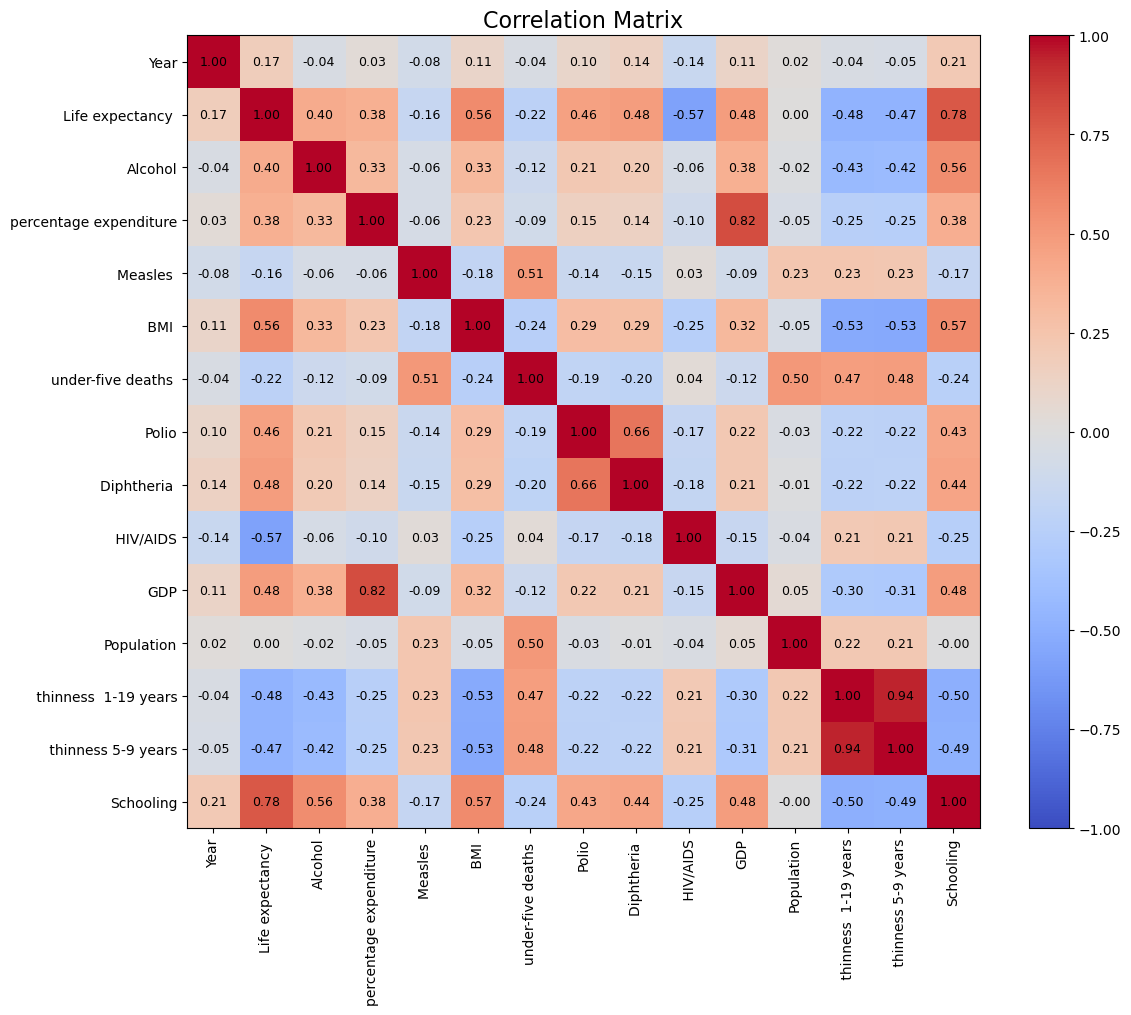

In [57]:
# Correlation matrix for numeric features
corr_matrix = life_df_cleaning[num_cols].corr()
plt.figure(figsize=(12,10))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(im)
num_vars = len(corr_matrix.columns)
ticks = np.arange(num_vars)
plt.xticks(ticks, corr_matrix.columns, rotation=90)
plt.yticks(ticks, corr_matrix.columns)
plt.title("Correlation Matrix", fontsize=16)

# Label correlations on the heatmap
for i in range(num_vars):
    for j in range(num_vars):
        val = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{val:.2f}",
                 ha='center', va='center', color='black', fontsize=9)
plt.tight_layout()
plt.show()

In [59]:
# Sort correlation with Life expectancy in descending order
life_corrs = corr_matrix["Life expectancy "].sort_values(ascending=False)
life_corrs

Life expectancy           1.000000
Schooling                 0.776351
 BMI                      0.564410
GDP                       0.480748
Diphtheria                0.478165
Polio                     0.460059
Alcohol                   0.401020
percentage expenditure    0.381115
Year                      0.171968
Population                0.002875
Measles                  -0.161276
under-five deaths        -0.224853
 thinness 5-9 years      -0.470038
 thinness  1-19 years    -0.475277
 HIV/AIDS                -0.570326
Name: Life expectancy , dtype: float64

In [61]:
# Recompute correlation matrix with only numeric columns
num_cols = life_df_cleaning.select_dtypes(include=[np.number]).columns
corr_matrix_2 = life_df_cleaning[num_cols].corr()
corr_matrix_2

,Year,Life expectancy,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling
Year,1.000000,0.171968,-0.044944,0.033137,-0.084156,0.106640,-0.042418,0.101328,0.138003,-0.141793,0.110460,0.019859,-0.043592,-0.048901,0.209496
Life expectancy,0.171968,1.000000,0.401020,0.381115,-0.161276,0.564410,-0.224853,0.460059,0.478165,-0.570326,0.480748,0.002875,-0.475277,-0.470038,0.776351
Alcohol,-0.044944,0.401020,1.000000,0.325004,-0.057852,0.327910,-0.117500,0.214624,0.203112,-0.059693,0.381450,-0.018827,-0.429424,-0.417704,0.561443
percentage expenditure,0.033137,0.381115,0.325004,1.000000,-0.058588,0.228758,-0.089302,0.145761,0.139499,-0.101333,0.819166,-0.047320,-0.249805,-0.251135,0.384113
Measles,-0.084156,-0.161276,-0.057852,-0.058588,1.000000,-0.180406,0.507457,-0.139912,-0.147647,0.029968,-0.086384,0.233197,0.228753,0.225170,-0.166969
BMI,0.106640,0.564410,0.327910,0.228758,-0.180406,1.000000,-0.243131,0.291197,0.288990,-0.251373,0.320458,-0.047250,-0.527451,-0.533630,0.569325
under-five deaths,-0.042418,-0.224853,-0.117500,-0.089302,0.507457,-0.243131,1.000000,-0.193942,-0.203483,0.036947,-0.122670,0.500598,0.474921,0.479637,-0.241796
Polio,0.101328,0.460059,0.214624,0.145761,-0.139912,0.291197,-0.193942,1.000000,0.660944,-0.170133,0.216235,-0.034633,-0.218523,-0.219987,0.428166
Diphtheria,0.138003,0.478165,0.203112,0.139499,-0.147647,0.288990,-0.203483,0.660944,1.000000,-0.178642,0.214150,-0.014496,-0.224372,-0.218260,0.439606
HIV/AIDS,-0.141793,-0.570326,-0.059693,-0.101333,0.029968,-0.251373,0.036947,-0.170133,-0.178642,1.000000,-0.152334,-0.035585,0.209418,0.212865,-0.251358


In [63]:
# Log-transform GDP to reduce skew
life_df_cleaning["log_GDP"] = np.log1p(life_df_cleaning["GDP"])

In [65]:
# Convert 'Status' to dummy (one-hot) variables
df_dummies = pd.get_dummies(
    life_df_cleaning, 
    columns=["Status"], 
    drop_first=True,    
    dtype=int
)

print(df_dummies.columns)

Index(['Country', 'Year', 'Life expectancy ', 'Alcohol',
       'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling', 'log_GDP',
       'Status_Developing'],
      dtype='object')


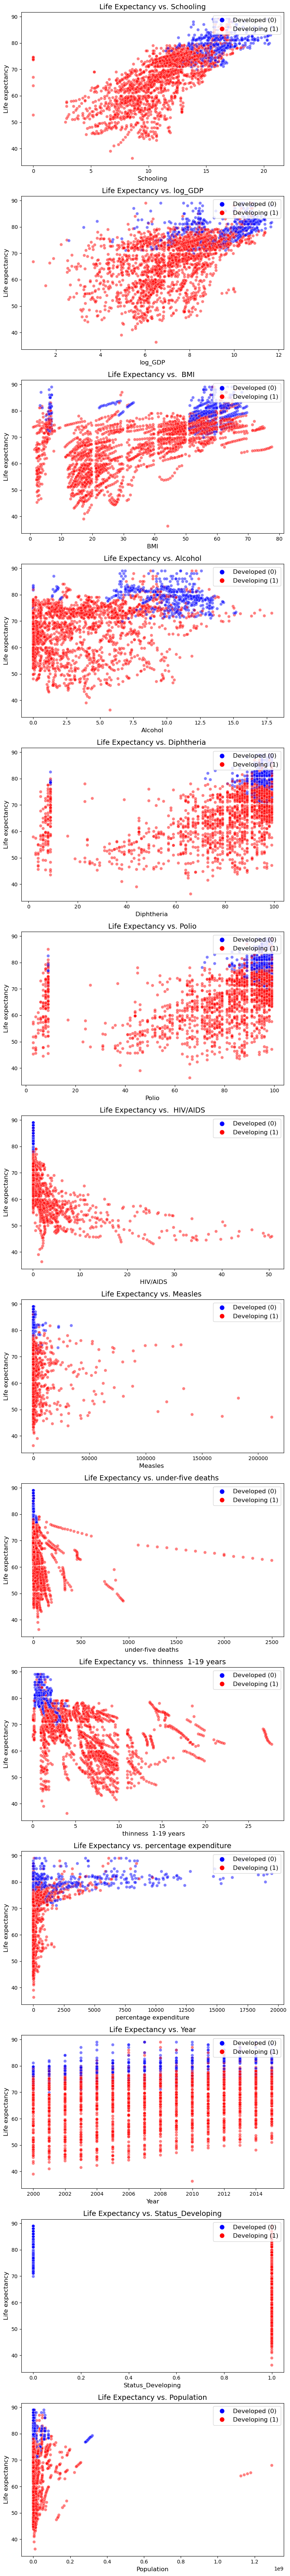

In [69]:
interesting_feats = [
    "Schooling",                                       
    "log_GDP",                  
    " BMI ",                      
    "Alcohol",                    
    "Diphtheria ", "Polio",    
    " HIV/AIDS", "Measles ",               
    "under-five deaths ",        
    " thinness  1-19 years",    
    "percentage expenditure",     
    "Year",                      
    "Status_Developing",
    "Population"
]

n_feats = len(interesting_feats)
n_cols = 1
n_rows = math.ceil(n_feats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 5 * n_rows))
axes = axes.ravel()

# Define the two colors for binary classification (0 and 1)
colors = {0: 'blue', 1: 'red'}  # Blue for developed, Red for developing

for i, feat in enumerate(interesting_feats):
    ax = axes[i]
    
    # Scatter plot where colors are determined by the 'Status_Developing' column (0 or 1)
    ax.scatter(
        df_dummies[feat],
        df_dummies["Life expectancy "],
        c=df_dummies["Status_Developing"].map(colors),  # Map 0 to 'blue' and 1 to 'red'
        alpha=0.5,           
        edgecolors='white',  
        linewidth=0.5,
    )
    
    ax.set_xlabel(feat, fontsize=12)
    ax.set_ylabel("Life expectancy", fontsize=12)
    ax.set_title(f"Life Expectancy vs. {feat}", fontsize=14)

    # Add a legend to indicate what colors represent
    ax.legend(
        handles=[
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Developed (0)'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Developing (1)')
        ], 
        loc='upper right', 
        fontsize=12
    )

# Remove extra axes if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [71]:
# Define target variable
X = df_dummies[interesting_feats].copy()
X.head()

,Schooling,log_GDP,BMI,Alcohol,Diphtheria,Polio,HIV/AIDS,Measles,under-five deaths,thinness 1-19 years,percentage expenditure,Year,Status_Developing,Population
0,10.1,6.372055,19.1,0.014667,65.0,6.0,0.1,1154,83,17.2,71.279624,2015,1,33736494.0
1,10.0,6.419501,18.6,0.010000,62.0,58.0,0.1,492,86,17.5,73.523582,2014,1,327582.0
2,9.9,6.450067,18.1,0.010000,64.0,62.0,0.1,430,89,17.7,73.219243,2013,1,31731688.0
3,9.8,6.508708,17.6,0.010000,67.0,67.0,0.1,2787,93,17.9,78.184215,2012,1,3696958.0
4,9.5,4.167242,17.2,0.010000,68.0,68.0,0.1,3013,97,18.2,7.097109,2011,1,2978599.0


In [73]:
y = df_dummies["Life expectancy "].copy()
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [75]:
# Create feature subsets for analysis
economic_features = ["log_GDP", "percentage expenditure", "Schooling", "Population"]
health_features = [" BMI ", " thinness  1-19 years", "Alcohol"]
immunization_features = ["Polio", "Diphtheria "]
disease_features = [" HIV/AIDS", "Measles ", "under-five deaths "]
other_features = ["Year", "Status_Developing"]

feature_groups = {
    "Economic": economic_features,
    "Health": health_features,
    "Immunization": immunization_features,
    "Disease": disease_features,
    "Other": other_features
}
for category, features in feature_groups.items():
    print(f"{category} Features: {features}")

Economic Features: ['log_GDP', 'percentage expenditure', 'Schooling', 'Population']
Health Features: [' BMI ', ' thinness  1-19 years', 'Alcohol']
Immunization Features: ['Polio', 'Diphtheria ']
Disease Features: [' HIV/AIDS', 'Measles ', 'under-five deaths ']
Other Features: ['Year', 'Status_Developing']


Linear Regression (Cross-Validation Evaluation)
Mean R² Score: 0.7878 ± 0.0079
Mean MAE: 3.3878 ± 0.1107
Mean RMSE: 4.3933 ± 0.1719
Linear Regression (Test Set Evaluation)
MAE: 3.1491
RMSE: 4.0128
R² Score: 0.8175

Intercept: 69.47517857142859

Feature Coefficients:
Schooling: 4.2982
log_GDP: 1.1195
 BMI : 0.7681
Alcohol: -0.5370
Diphtheria : 0.9168
Polio: 0.6720
 HIV/AIDS: -3.5866
Measles : -0.1656
under-five deaths : 0.0017
 thinness  1-19 years: -0.3662
percentage expenditure: 0.4502
Year: -0.2730
Status_Developing: -0.6246
Population: 0.0540


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


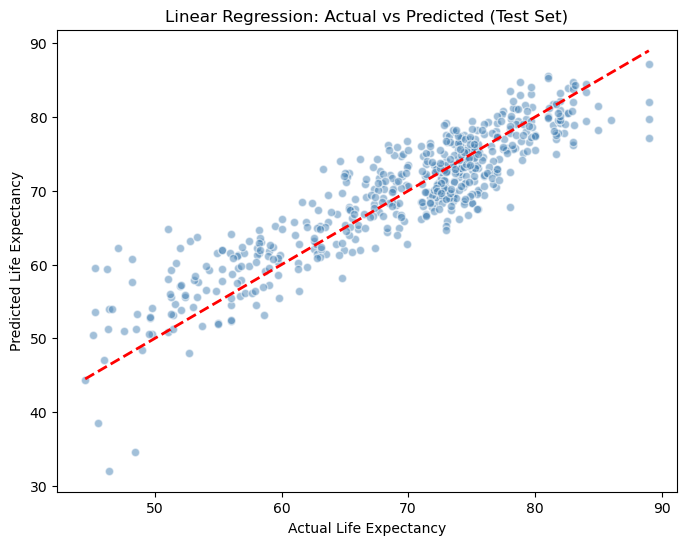

In [83]:
X = df_dummies[interesting_feats].copy()
y = df_dummies["Life expectancy "].copy()

# Split the data into training and testing sets first 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the X_train and X_test separately using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Create KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

lr = LinearRegression()

cv_results = cross_validate(lr, X_train_scaled, y_train, cv=cv, 
                            scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'])

# Extract and print mean cross-validation scores
print("Linear Regression (Cross-Validation Evaluation)")
print(f"Mean R² Score: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")
print(f"Mean MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.4f} ± {cv_results['test_neg_mean_absolute_error'].std():.4f}")
print(f"Mean RMSE: {-cv_results['test_neg_root_mean_squared_error'].mean():.4f} ± {cv_results['test_neg_root_mean_squared_error'].std():.4f}")

# Fit the model on the scaled training data
lr.fit(X_train_scaled, y_train)

# Predict on the test set 
y_pred_test = lr.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

# Get the model's coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Print evaluation metrics and coefficients
print("Linear Regression (Test Set Evaluation)")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}\n")

print("Intercept:", intercept)
print("\nFeature Coefficients:")
for feature, coef in zip(interesting_feats, coefficients):
    print(f"{feature}: {coef:.4f}")

# Scatter plot of actual vs predicted values for the test set
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='steelblue', edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.show()


=== RidgeCV ===
Cross-validated R²: 0.7862 ± 0.0183
Cross-validated MSE: 19.3027 ± 0.8275
Test Set MAE: 3.1553
Test Set MSE: 16.1717
Test Set RMSE: 4.0214
Test Set R²: 0.8167

=== LassoCV ===
Cross-validated R²: 0.7864 ± 0.0180
Cross-validated MSE: 19.2884 ± 0.8531
Test Set MAE: 3.1566
Test Set MSE: 16.1621
Test Set RMSE: 4.0202
Test Set R²: 0.8168

Best Ridge Alpha: 24.420530945486497
Best Lasso Alpha: 0.02811768697974228

=== Ridge Regression Coefficients ===
Schooling                 4.193243
log_GDP                   1.127714
 BMI                      0.791682
Alcohol                  -0.497805
Diphtheria                0.924052
Polio                     0.683031
 HIV/AIDS                -3.552645
Measles                  -0.165577
under-five deaths        -0.004853
 thinness  1-19 years    -0.376060
percentage expenditure    0.456077
Year                     -0.248796
Status_Developing        -0.634678
Population                0.060575
dtype: float64

=== Lasso Regression Coeffi

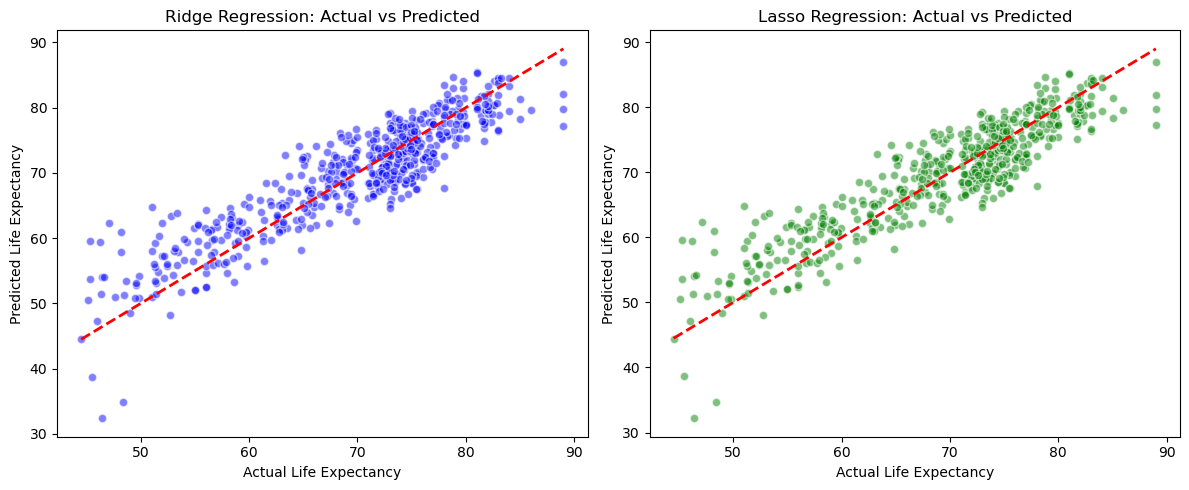

In [85]:
# Generate log-spaced alphas for Ridge & Lasso
alphas = np.logspace(-4, 4, 50)  

# RidgeCV model (auto-tunes best alpha)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)

# LassoCV model (auto-tunes best alpha)
lasso_cv = LassoCV(alphas=alphas, max_iter=5000, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Basic test-set metrics
def evaluate_model(y_true, y_pred, model, X_train, y_train):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Cross-validation scores (on training data)
    cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    print(f"\n=== {model.__class__.__name__} ===")
    print(f"Cross-validated R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
    print(f"Cross-validated MSE: {-cv_mse.mean():.4f} ± {cv_mse.std():.4f}")
    print(f"Test Set MAE: {mae:.4f}")
    print(f"Test Set MSE: {mse:.4f}")
    print(f"Test Set RMSE: {rmse:.4f}")
    print(f"Test Set R²: {r2:.4f}")

# Evaluate models
evaluate_model(y_test, y_pred_ridge, ridge_cv, X_train, y_train)
evaluate_model(y_test, y_pred_lasso, lasso_cv, X_train, y_train)

# Print best alpha values
print("\nBest Ridge Alpha:", ridge_cv.alpha_)
print("Best Lasso Alpha:", lasso_cv.alpha_)

# Extract and display coefficients
ridge_coefs = pd.Series(ridge_cv.coef_, index=pd.DataFrame(X_train).columns)
lasso_coefs = pd.Series(lasso_cv.coef_, index=pd.DataFrame(X_train).columns)

print("\n=== Ridge Regression Coefficients ===")
print(ridge_coefs)

print("\n=== Lasso Regression Coefficients (Non-zero only) ===")
print(lasso_coefs[lasso_coefs != 0])

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue', edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Ridge Regression: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='green', edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Lasso Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== Cross-Validation Results for Best Random Forest Model ===
Mean R² Score: 0.9443 ± 0.0085
Mean MAE: 1.5282 ± 0.0734
Mean RMSE: 2.2405 ± 0.2020

=== Tuned Random Forest Regression ===
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 1.3206
MSE: 3.7216
RMSE: 1.9292
R² Score: 0.9578

=== Feature Importance (Tuned Random Forest) ===
Status_Developing: 0.0042
Measles : 0.0066
Polio: 0.0071
Population: 0.0084
Diphtheria : 0.0088
percentage expenditure: 0.0117
log_GDP: 0.0134
Year: 0.0154
Alcohol: 0.0172
under-five deaths : 0.0282
 BMI : 0.0337
 thinness  1-19 years: 0.0437
Schooling: 0.1708
 HIV/AIDS: 0.6308


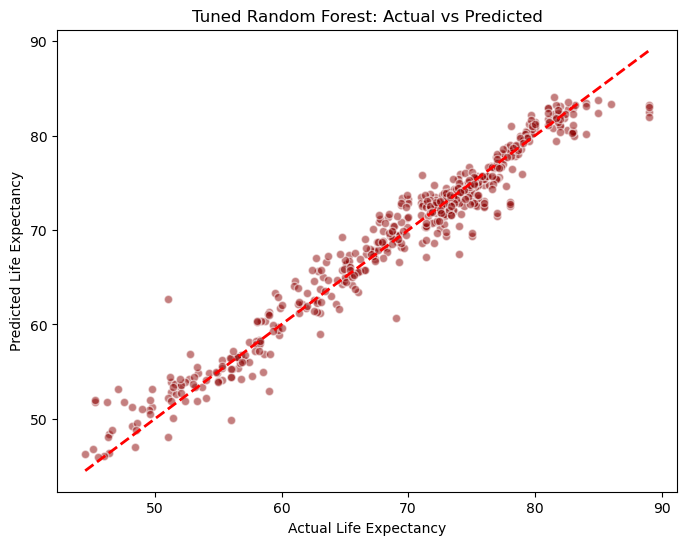

In [87]:
# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [10, 20, 30, None],      
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]         
}

# Instantiate & run GridSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best estimator & cross-validation
best_rf = grid_search.best_estimator_

cv_results = cross_validate(best_rf, X_train_scaled, y_train, cv=5, 
                            scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'])

# Print CV results
print("\n=== Cross-Validation Results for Best Random Forest Model ===")
print(f"Mean R² Score: {cv_results['test_r2'].mean():.4f} ± {cv_results['test_r2'].std():.4f}")
print(f"Mean MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.4f} ± {cv_results['test_neg_mean_absolute_error'].std():.4f}")
print(f"Mean RMSE: {-cv_results['test_neg_root_mean_squared_error'].mean():.4f} ± {cv_results['test_neg_root_mean_squared_error'].std():.4f}")

# Test set predictions & metrics
y_pred_rf = best_rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("\n=== Tuned Random Forest Regression ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Examine feature importances
feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)

print("\n=== Feature Importance (Tuned Random Forest) ===")
for feature, importance in zip(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx]):
    print(f"{feature}: {importance:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='darkred', edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.show()

In [54]:
#DEVELOPED DEVELOPING EXPLORATION

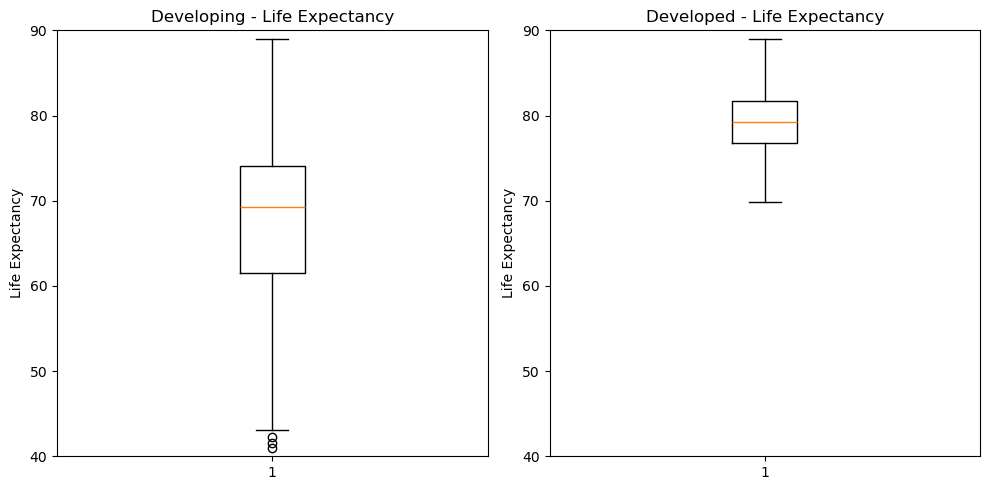

In [53]:
numeric_vars = ["Life expectancy "]

# Create a figure with two subplots arranged in a row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

# Define the y-axis limits
y_min, y_max = 40, 90  

# Boxplot for df_developing
axes[0].boxplot(df_developing[numeric_vars].dropna())  
axes[0].set_title("Developing - Life Expectancy")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_ylim(y_min, y_max)  # Set y-axis limits

# Boxplot for df_developed
axes[1].boxplot(df_developed[numeric_vars].dropna())  
axes[1].set_title("Developed - Life Expectancy")
axes[1].set_ylabel("Life Expectancy")
axes[1].set_ylim(y_min, y_max)  # Set y-axis limits

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Developed ===
MAE: 1.8504
MSE: 6.1091
RMSE: 2.4717
R² Score: 0.6075

=== Ridge - Developing ===
MAE: 3.4762
MSE: 20.7432
RMSE: 4.5545
R² Score: 0.7455

=== Lasso - Developed ===
MAE: 1.8504
MSE: 6.0970
RMSE: 2.4692
R² Score: 0.6083

=== Lasso - Developing ===
MAE: 3.4730
MSE: 20.7455
RMSE: 4.5547
R² Score: 0.7455

=== Random Forest - Developed ===
MAE: 1.2048
MSE: 3.1510
RMSE: 1.7751
R² Score: 0.7976

=== Random Forest - Developing ===
MAE: 1.5408
MSE: 5.1200
RMSE: 2.2627
R² Score: 0.9372

=== RidgeCV ===
Cross-validated R²: 0.4748 ± 0.0603
Cross-validated MSE: 8.0071 ± 1.2843

=== RidgeCV ===
Cross-validated R²: 0.7660 ± 0.0369
Cross-validated MSE: 18.9220 ± 2.9291

=== LassoCV ===
Cross-validated R²: 0.4757 ± 0.0538
Cross-validated MSE: 7.9985 ± 1.2583

=== LassoCV ===
Cross-validated R²: 0.7656 ± 0.0378
Cross-validated MSE: 18.9501 ± 2.9875
Fitting 3

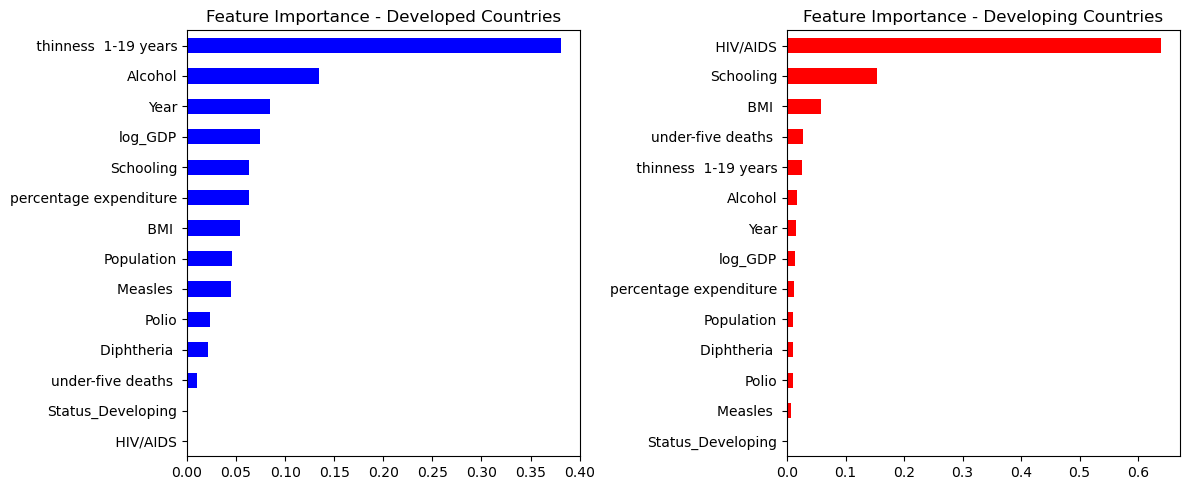

In [89]:
# Split dataset into Developed vs. Developing 
df_developed = df_dummies[df_dummies["Status_Developing"] == 0].copy()
df_developing = df_dummies[df_dummies["Status_Developing"] == 1].copy()

# Select features & target for Developed
X_dev = df_developed[interesting_feats]
y_dev = df_developed["Life expectancy "]

# Select features & target for Developing
X_deving = df_developing[interesting_feats]
y_deving = df_developing["Life expectancy "]

# Scale Developed data, then split into train/test
scaler_dev = StandardScaler()

X_dev_train, X_dev_test, y_dev_train, y_dev_test = train_test_split(X_dev, y_dev, test_size=0.3)

scaler_dev.fit(X_dev_train)
X_dev_train_scaled = scaler_dev.transform(X_dev_train)
X_dev_test_scaled = scaler_dev.transform(X_dev_test)

# Scale Developing data, then split into train/test
scaler_deving = StandardScaler()

X_deving_train, X_deving_test, y_deving_train, y_deving_test = train_test_split(X_deving, y_deving, test_size=0.3)

scaler_deving.fit(X_deving_train)
X_deving_train_scaled = scaler_deving.transform(X_deving_train)
X_deving_test_scaled = scaler_deving.transform(X_deving_test)

# Range of alphas for Ridge & Lasso
alphas = np.logspace(-4, 4, 50)

# RidgeCV for Developed & Developing
ridge_dev = RidgeCV(alphas=alphas, scoring='r2', cv=5).fit(X_dev_train_scaled, y_dev_train)
ridge_deving = RidgeCV(alphas=alphas, scoring='r2', cv=5).fit(X_deving_train_scaled, y_deving_train)

# LassoCV for Developed & Developing
lasso_dev = LassoCV(alphas=alphas, max_iter=5000, cv=5).fit(X_dev_train_scaled, y_dev_train)
lasso_deving = LassoCV(alphas=alphas, max_iter=5000, cv=5).fit(X_deving_train_scaled, y_deving_train)

# Parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch for Developed vs. Developing
rf_dev = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
rf_deving = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

rf_dev.fit(X_dev_train_scaled, y_dev_train)
rf_deving.fit(X_deving_train_scaled, y_deving_train)

best_rf_dev = rf_dev.best_estimator_
best_rf_deving = rf_deving.best_estimator_

y_pred_rf_dev = best_rf_dev.predict(X_dev_test_scaled)
y_pred_rf_deving = best_rf_deving.predict(X_deving_test_scaled)

#  Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== {model_name} ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
# Cross-validation helper
def cv_evaluation(model, X_train, y_train):
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    print(f"\n=== {model.__class__.__name__} ===")
    print(f"Cross-validated R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
    print(f"Cross-validated MSE: {-cv_mse.mean():.4f} ± {cv_mse.std():.4f}")

# Evaluate & compare models on Developed & Developing
evaluate_model(y_dev_test, ridge_dev.predict(X_dev_test_scaled), "Ridge - Developed")
evaluate_model(y_deving_test, ridge_deving.predict(X_deving_test_scaled), "Ridge - Developing")

evaluate_model(y_dev_test, lasso_dev.predict(X_dev_test_scaled), "Lasso - Developed")
evaluate_model(y_deving_test, lasso_deving.predict(X_deving_test_scaled), "Lasso - Developing")

evaluate_model(y_dev_test, y_pred_rf_dev, "Random Forest - Developed")
evaluate_model(y_deving_test, y_pred_rf_deving, "Random Forest - Developing")

# Cross-validation on training subsets
cv_evaluation(ridge_dev, X_dev_train_scaled, y_dev_train)
cv_evaluation(ridge_deving, X_deving_train_scaled, y_deving_train)
cv_evaluation(lasso_dev, X_dev_train_scaled, y_dev_train)
cv_evaluation(lasso_deving, X_deving_train_scaled, y_deving_train)
cv_evaluation(rf_dev, X_dev_train_scaled, y_dev_train)
cv_evaluation(rf_deving, X_deving_train_scaled, y_deving_train)

# Compare coefficients & feature importance
ridge_coefs_dev = pd.Series(ridge_dev.coef_, index=X_dev.columns)
ridge_coefs_deving = pd.Series(ridge_deving.coef_, index=X_deving.columns)

lasso_coefs_dev = pd.Series(lasso_dev.coef_, index=X_dev.columns)
lasso_coefs_deving = pd.Series(lasso_deving.coef_, index=X_deving.columns)

rf_importance_dev = pd.Series(best_rf_dev.feature_importances_, index=X_dev.columns)
rf_importance_deving = pd.Series(best_rf_deving.feature_importances_, index=X_deving.columns)

print("\n=== Ridge Coefficients (Developed) ===")
print(ridge_coefs_dev.sort_values(ascending=False))

print("\n=== Ridge Coefficients (Developing) ===")
print(ridge_coefs_deving.sort_values(ascending=False))

print("\n=== Lasso Selected Features (Developed) ===")
print(lasso_coefs_dev[lasso_coefs_dev != 0])

print("\n=== Lasso Selected Features (Developing) ===")
print(lasso_coefs_deving[lasso_coefs_deving != 0])

print("\n=== Random Forest Feature Importance (Developed) ===")
print(rf_importance_dev.sort_values(ascending=False))

print("\n=== Random Forest Feature Importance (Developing) ===")
print(rf_importance_deving.sort_values(ascending=False))

# Plot feature importances
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
rf_importance_dev.sort_values(ascending=True).plot(kind="barh", color="blue")
plt.title("Feature Importance - Developed Countries")

plt.subplot(1,2,2)
rf_importance_deving.sort_values(ascending=True).plot(kind="barh", color="red")
plt.title("Feature Importance - Developing Countries")

plt.tight_layout()
plt.show()

In [91]:
# Get unique Countries & sort
unique_countries = df_dummies["Country"].unique()
df_countries = pd.DataFrame(unique_countries, columns=["Country"])
df_countries_sorted = df_countries.sort_values("Country").reset_index(drop=True)
df_countries_sorted

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
170,Venezuela (Bolivarian Republic of)
171,Viet Nam
172,Yemen
173,Zambia


In [93]:
# Print them in groups of five per line
for i in range(0, len(df_countries_sorted), 5):
    print(", ".join(df_countries_sorted["Country"].iloc[i:i+5]))

Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda
Argentina, Armenia, Australia, Austria, Azerbaijan
Bahamas, Bahrain, Bangladesh, Barbados, Belarus
Belgium, Belize, Benin, Bhutan, Bolivia (Plurinational State of)
Bosnia and Herzegovina, Botswana, Brazil, Brunei Darussalam, Bulgaria
Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon
Canada, Central African Republic, Chad, Chile, China
Colombia, Comoros, Congo, Costa Rica, Croatia
Cuba, Cyprus, Czechia, Côte d'Ivoire, Democratic Republic of the Congo
Denmark, Djibouti, Dominican Republic, Ecuador, Egypt
El Salvador, Equatorial Guinea, Estonia, Ethiopia, Fiji
Finland, France, Gabon, Gambia, Georgia
Germany, Ghana, Greece, Grenada, Guatemala
Guinea, Guinea-Bissau, Guyana, Haiti, Honduras
Hungary, Iceland, India, Indonesia, Iran (Islamic Republic of)
Iraq, Ireland, Israel, Italy, Jamaica
Japan, Jordan, Kazakhstan, Kenya, Kiribati
Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia, Lebanon
Lesotho, Liberia, Libya, Lith

In [95]:
# Create region mapping dictionary
region_mapping = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Côte d'Ivoire", "Democratic Republic of the Congo",
        "Djibouti", "Egypt", "Equatorial Guinea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea",
        "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi",
        "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
        "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "South Africa",
        "Swaziland", "United Republic of Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Europe": [
        "Albania", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Georgia",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Republic of Moldova", "Montenegro", "Netherlands", "The former Yugoslav republic of Macedonia", "Norway",
        "Poland", "Portugal", "Romania", "Russian Federation", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Turkey", "Ukraine", "United Kingdom of Great Britain and Northern Ireland"
    ],
    "Asia": [
        "Afghanistan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia", "China",
        "India", "Indonesia", "Iran (Islamic Republic of)", "Iraq", "Israel", "Japan", "Jordan", "Kuwait", "Kyrgyzstan",
        "Lao People's Democratic Republic", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan",
        "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "Republic of Korea", "Sri Lanka",
        "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkmenistan", "United Arab Emirates", "Uzbekistan",
        "Viet Nam", "Yemen"
    ],
    "Americas": [
        "Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", "Bolivia (Plurinational State of)", "Brazil", "Canada", "Chile", "Colombia",
        "Costa Rica", "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Grenada", "Guatemala",
        "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru",
        "Saint Lucia", "Saint Vincent and the Grenadines", "Suriname", "Trinidad and Tobago", "United States of America",
        "Uruguay", "Venezuela (Bolivarian Republic of)"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Micronesia (Federated States of)", "New Zealand", "Papua New Guinea", "Samoa",
        "Solomon Islands", "Tonga", "Vanuatu"
    ]
}
# Loop through region dict & assign
country_to_region = {}
for region, countries in region_mapping.items():
    for country in countries:
        country_to_region[country] = region
        
df_dummies["Region"] = df_dummies["Country"].map(country_to_region)

# Fill any still-missing region as "Other"
df_dummies.loc[:, "Region"] = df_dummies["Region"].fillna("Other")

# Confirm Region distribution
print(df_dummies["Region"].value_counts())

Region
Africa      800
Europe      704
Asia        608
Americas    528
Oceania     160
Name: count, dtype: int64


In [58]:
print(df_dummies["Region"].nunique()) 
print(df_dummies["Country"].nunique())  

5
175


In [1]:
# Calculate mean life expectancy by region
life_expectancies_mean = df_dummies.groupby(by="Region")[["Life expectancy "]].mean()

# Sort by 'Life expectancy ' column in descending order
life_expectancies_mean_sorted = life_expectancies_mean.sort_values(by="Life expectancy ", ascending=False)

life_expectancies_mean_sorted

NameError: name 'df_dummies' is not defined


==== Processing Region: Asia ====
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Asia ===
MAE: 2.3024
MSE: 8.8501
RMSE: 2.9749
R² Score: 0.7601

=== Lasso - Asia ===
MAE: 2.2935
MSE: 8.8371
RMSE: 2.9727
R² Score: 0.7605

=== Random Forest - Asia ===
MAE: 1.1291
MSE: 2.8331
RMSE: 1.6832
R² Score: 0.9232

=== RidgeCV ===
Cross-validated R²: 0.7421 ± 0.0504
Cross-validated MSE: 9.4876 ± 1.3883

=== LassoCV ===
Cross-validated R²: 0.7402 ± 0.0555
Cross-validated MSE: 9.5387 ± 1.5268
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


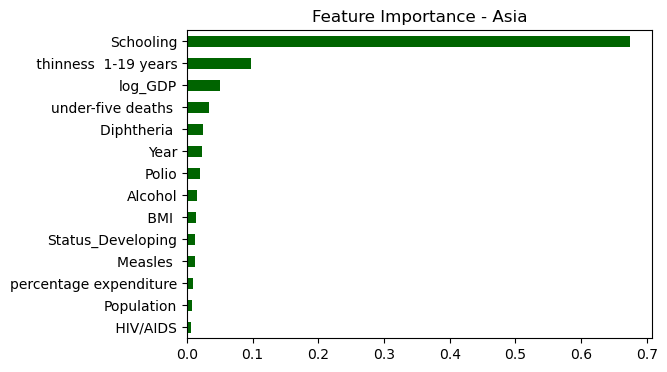


==== Processing Region: Europe ====
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Europe ===
MAE: 2.2850
MSE: 9.4360
RMSE: 3.0718
R² Score: 0.6264

=== Lasso - Europe ===
MAE: 2.2764
MSE: 9.6963
RMSE: 3.1139
R² Score: 0.6161

=== Random Forest - Europe ===
MAE: 1.4786
MSE: 4.4338
RMSE: 2.1057
R² Score: 0.8244

=== RidgeCV ===
Cross-validated R²: 0.6267 ± 0.0457
Cross-validated MSE: 9.4156 ± 1.3568

=== LassoCV ===
Cross-validated R²: 0.6354 ± 0.0343
Cross-validated MSE: 9.2154 ± 1.2658
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 

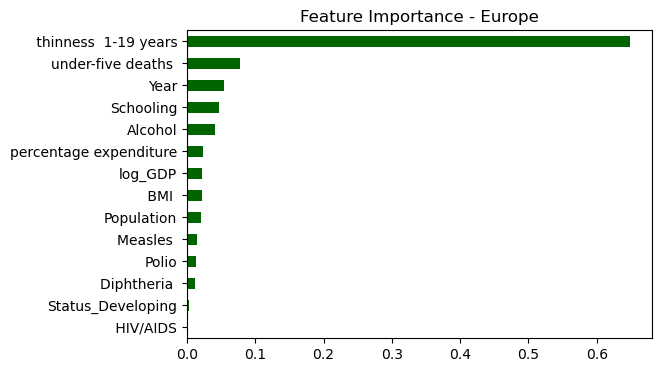


==== Processing Region: Africa ====
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Africa ===
MAE: 3.3827
MSE: 19.3177
RMSE: 4.3952
R² Score: 0.7385

=== Lasso - Africa ===
MAE: 3.3792
MSE: 19.3157
RMSE: 4.3950
R² Score: 0.7385

=== Random Forest - Africa ===
MAE: 1.5507
MSE: 4.9608
RMSE: 2.2273
R² Score: 0.9328

=== RidgeCV ===
Cross-validated R²: 0.7114 ± 0.0348
Cross-validated MSE: 18.3564 ± 3.2842

=== LassoCV ===
Cross-validated R²: 0.7096 ± 0.0349
Cross-validated MSE: 18.4970 ± 3.4500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totall

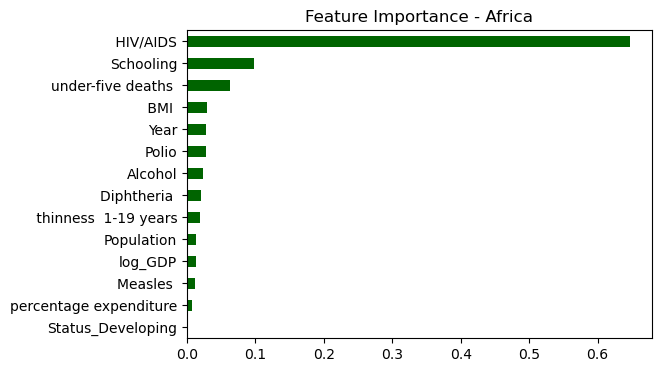


==== Processing Region: Americas ====
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Americas ===
MAE: 2.2117
MSE: 7.9777
RMSE: 2.8245
R² Score: 0.5809

=== Lasso - Americas ===
MAE: 2.1906
MSE: 7.8959
RMSE: 2.8100
R² Score: 0.5851

=== Random Forest - Americas ===
MAE: 1.0266
MSE: 2.3425
RMSE: 1.5305
R² Score: 0.8769

=== RidgeCV ===
Cross-validated R²: 0.5107 ± 0.0774
Cross-validated MSE: 9.9901 ± 5.3292

=== LassoCV ===
Cross-validated R²: 0.5071 ± 0.0743
Cross-validated MSE: 10.0281 ± 5.2156
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, t

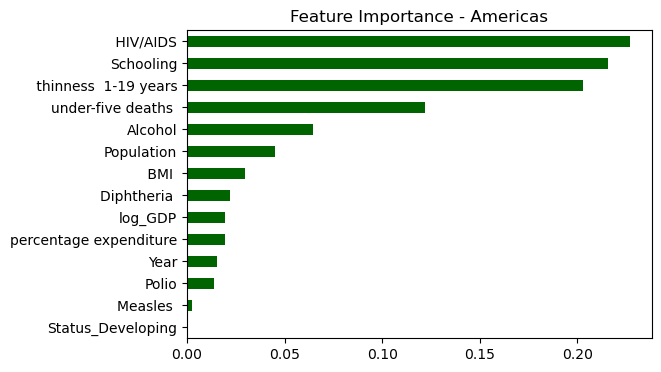


==== Processing Region: Oceania ====
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== Ridge - Oceania ===
MAE: 1.8454
MSE: 6.8428
RMSE: 2.6159
R² Score: 0.8542

=== Lasso - Oceania ===
MAE: 1.8419
MSE: 6.5065
RMSE: 2.5508
R² Score: 0.8614

=== Random Forest - Oceania ===
MAE: 1.0878
MSE: 3.2656
RMSE: 1.8071
R² Score: 0.9304

=== RidgeCV ===
Cross-validated R²: 0.8002 ± 0.0633
Cross-validated MSE: 6.9258 ± 2.1600

=== LassoCV ===
Cross-validated R²: 0.8037 ± 0.0651
Cross-validated MSE: 6.7471 ± 2.1135
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totall

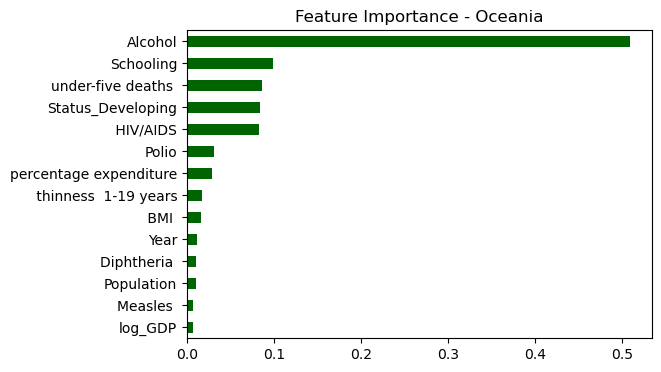

,,MAE,MSE,RMSE,R²
Ridge,Asia,2.302376,8.850061,2.974905,0.760138
Lasso,Asia,2.293492,8.837121,2.972730,0.760489
Random Forest,Asia,1.129087,2.833068,1.683172,0.923216
Ridge,Europe,2.284998,9.435950,3.071799,0.626391
Lasso,Europe,2.276446,9.696305,3.113889,0.616083
Random Forest,Europe,1.478594,4.433840,2.105669,0.824446
Ridge,Africa,3.382651,19.317670,4.395187,0.738485
Lasso,Africa,3.379230,19.315712,4.394964,0.738511
Random Forest,Africa,1.550707,4.960782,2.227281,0.932843
Ridge,Americas,2.211694,7.977691,2.824481,0.580850


In [97]:
# List all unique regions
regions = df_dummies["Region"].unique()

region_results = {}

# For each region, split data, train models & evaluate
for region in regions:
    print(f"\n==== Processing Region: {region} ====")

    # Subset features & targt
    df_region = df_dummies[df_dummies["Region"] == region].copy()
    X_region = df_region[interesting_feats]
    y_region = df_region["Life expectancy "]

    # Train/test split
    X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_region, y_region, test_size=0.3)

    # Scale numeric features
    scaler_region = StandardScaler()
    scaler_region.fit(X_train_region)
    X_train_region_scaled = scaler_region.transform(X_train_region)
    X_test_region_scaled = scaler_region.transform(X_test_region)
    
    # Train Ridge & Lasso
    ridge_region = RidgeCV(alphas=alphas, scoring='r2', cv=5).fit(X_train_region_scaled, y_train_region)
    lasso_region = LassoCV(alphas=alphas, max_iter=5000, cv=5).fit(X_train_region_scaled, y_train_region)
    
    # Random Forest with GridSearch
    rf_region = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
    rf_region.fit(X_train_region_scaled, y_train_region)
    best_rf_region = rf_region.best_estimator_
    y_pred_rf_region = best_rf_region.predict(X_test_region_scaled)

    # Define quick evaluation function
    def evaluate_model(y_true, y_pred, model_name, region):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        print(f"\n=== {model_name} - {region} ===")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R² Score: {r2:.4f}")
        
        # Store results in a dictionary for later
        region_results[(model_name, region)] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}
        
    # Evaluate each model on test set
    evaluate_model(y_test_region, ridge_region.predict(X_test_region_scaled), "Ridge", region)
    evaluate_model(y_test_region, lasso_region.predict(X_test_region_scaled), "Lasso", region)
    evaluate_model(y_test_region, y_pred_rf_region, "Random Forest", region)

    # Check cross-validation on training data
    def cv_evaluation(model, X_train, y_train):
        cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

        print(f"\n=== {model.__class__.__name__} ===")
        print(f"Cross-validated R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
        print(f"Cross-validated MSE: {-cv_mse.mean():.4f} ± {cv_mse.std():.4f}")

    cv_evaluation(ridge_region, X_train_region_scaled, y_train_region)
    cv_evaluation(lasso_region, X_train_region_scaled, y_train_region)
    cv_evaluation(rf_region, X_train_region_scaled, y_train_region)

    # Print coefficients & feature importances
    ridge_coefs_region = pd.Series(ridge_region.coef_, index=X_region.columns)
    lasso_coefs_region = pd.Series(lasso_region.coef_, index=X_region.columns)
    rf_importance_region = pd.Series(best_rf_region.feature_importances_, index=X_region.columns)

    print("\n=== Ridge Coefficients -", region, "===")
    print(ridge_coefs_region.sort_values(ascending=False))

    print("\n=== Lasso Selected Features -", region, "===")
    print(lasso_coefs_region[lasso_coefs_region != 0])

    print("\n=== Random Forest Feature Importance -", region, "===")
    print(rf_importance_region.sort_values(ascending=False))
    
    # Plot feature importance
    plt.figure(figsize=(6,4))
    rf_importance_region.sort_values(ascending=True).plot(kind="barh", color="darkgreen")
    plt.title(f"Feature Importance - {region}")
    plt.show()

region_results_df = pd.DataFrame(region_results).T
region_results_df

In [2]:
#making sense of HIV as the most important variable in Africa
df_dummies.groupby(by="Country")[[" HIV/AIDS"]].describe()

NameError: name 'df_dummies' is not defined

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_scaled)

accuracy = accuracy_score(y, y_pred_best_rf)
print("\n=== Tuned Random Forest Classifier ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")

feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)

print("\n=== Feature Importance (Tuned Random Forest Classifier) ===")
for feature, importance in zip(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx]):
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(8,6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color="darkred")
plt.xlabel("Feature Importance")
plt.title("Tuned Feature Importance in High vs. Low Life Expectancy Classification")
plt.show()